In [1]:
import numpy as np
import pandas as pd

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from collections import Counter
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [11]:
import re,string
import nltk
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.sentiment.util import *
from nltk import tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from collections import Counter
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
import collections

snowballstemmer = SnowballStemmer("english")
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [41]:
AllTweets_sentiments_Cleaned = pd.read_csv("AllTweets_sentiments_Cleaned.csv")
print("Positive, Negative & Neutral Tweets",AllTweets_sentiments_Cleaned.shape)



Positive, Negative & Neutral Tweets (10363, 2)


In [42]:
AllTweets_sentiments_Cleaned_pos = AllTweets_sentiments_Cleaned[AllTweets_sentiments_Cleaned.sentiment == 1]
print("Positive Tweets",AllTweets_sentiments_Cleaned_pos.shape)

Positive Tweets (7238, 2)


In [43]:
AllTweets_sentiments_Cleaned_neg = AllTweets_sentiments_Cleaned[AllTweets_sentiments_Cleaned.sentiment == 0]
print("Negative Tweets",AllTweets_sentiments_Cleaned_neg.shape)

Negative Tweets (3125, 2)


In [44]:
AllTweets_sentiments_Cleaned_pos = AllTweets_sentiments_Cleaned_pos[:3500] #taking only 3500 positive tweets

In [45]:
AllTweets_sentiments_Cleaned = pd.concat([AllTweets_sentiments_Cleaned_pos,AllTweets_sentiments_Cleaned_neg])
print("Positive & Negative Tweets: ", AllTweets_sentiments_Cleaned.shape) # only positve and negative tweets 

Positive & Negative Tweets:  (6625, 2)


In [46]:
AllTweets_sentiments_Cleaned = AllTweets_sentiments_Cleaned.sample(frac=1) # Randomizing Dataframe rows

TweetsSentiments_Tweets = AllTweets_sentiments_Cleaned.Tweet  # only tweets
TweetsSentiments_sentiments = AllTweets_sentiments_Cleaned.sentiment # only sentiments

In [14]:
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def preprocess_word(word):
    word = word.strip('\'"?!,.():;')
    word = re.sub(r'(.)\1+', r'\1\1', word)
    word = re.sub(r'(-|\')', '', word)
    return word

def is_valid_word(word):
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

def handle_emojis(tweet):
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

def preprocess_tweet(tweet):
    processed_tweet = []
    tweet = tweet.lower()
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    tweet = tweet.strip(' "\'')
    tweet = handle_emojis(tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()

    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word):            
            processed_tweet.append(word)
    return ' '.join(processed_tweet)

In [22]:
NewData = pd.read_csv("TeamsTweets_V1.csv")

In [200]:
i = 0 
Total_Sentiments_Store = pd.DataFrame()
stat_New = pd.DataFrame()

statTemp = list()
pos ,neg ,neu= [],[],[]

df = NewData  
SP_cleaned_tweets_New = [0]*len(df["Tweet"]) # Creating List of size of tweets to store processed tweets

cleanedTweet_Sentiments_polarity = list()
Team_Tweets_Sentiments = list()

SP_cleaned_tweets_New = tweetsCleaning("TeamsTweets_V1.csv") #Specific Team   
cleanedTweet_Sentiments_polarity_New = sentiment_analysis(SP_cleaned_tweets_New) # Cleaned Tweets
Team_Tweets_Sentiments_New,lstT = assign_sentiments(cleanedTweet_Sentiments_polarity_New,df)

pos.append(lstT[0])
neg.append(lstT[1])
neu.append(lstT[2])

tw_df_New = pd.DataFrame.from_dict({"positive":pos,"negative":neg,"neutral": neu})

stat_New = stat.append(tw_df_New)    
i = i + 1    

Positive Tweets:  837
Negative Tweets:  484
Neutral Tweets:   1347


In [31]:
AllTweets_sentiments_Cleaned_pos = Team_Tweets_Sentiments[Team_Tweets_Sentiments.sentiment == 1]
print("Positive Tweets",AllTweets_sentiments_Cleaned_pos.shape)

Positive Tweets (837, 2)


In [32]:
AllTweets_sentiments_Cleaned_neg = Team_Tweets_Sentiments[Team_Tweets_Sentiments.sentiment == 0]
print("Negative Tweets",AllTweets_sentiments_Cleaned_neg.shape)

Negative Tweets (484, 2)


In [33]:
AllTweets_sentiments_Cleaned_pos = AllTweets_sentiments_Cleaned_pos[:500] #taking only 500 positive tweets

In [34]:
AllTweets_sentiments_Cleaned = pd.concat([AllTweets_sentiments_Cleaned_pos,AllTweets_sentiments_Cleaned_neg])
print("Positive & Negative Tweets: ", AllTweets_sentiments_Cleaned.shape) # only positve and negative tweets 

Positive & Negative Tweets:  (984, 2)


In [35]:
AllTweets_sentiments_Cleaned = AllTweets_sentiments_Cleaned.sample(frac=1) # Randomizing Dataframe rows

TweetsSentiments_Tweets = AllTweets_sentiments_Cleaned.Tweet  # only tweets
TweetsSentiments_sentiments = AllTweets_sentiments_Cleaned.sentiment # only sentiments

In [47]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(TweetsSentiments_Tweets)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(TweetsSentiments_Tweets)
X = pad_sequences(X)

In [37]:
GLOVE_DIM = 200
glove_file = 'glove.twitter.27B.' + str(GLOVE_DIM) + 'd.txt'
emb_dict = {}
glove = open(glove_file, encoding="utf8")
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

In [48]:
NB_WORDS = 10000
emb_matrix = np.zeros((NB_WORDS, GLOVE_DIM))

for w, i in tokenizer.word_index.items():
    if i < NB_WORDS:
        vect = emb_dict.get(w)        
        if vect is not None:
            emb_matrix[i] = vect
    else:
        break

In [50]:
embed_dim = 200
lstm_out = 196
model = Sequential()
model.add(Embedding(10000, embed_dim))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.layers[0].set_weights([emb_matrix])
model.layers[0].trainable = False
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               311248    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 394       
Total params: 4,311,642
Trainable params: 2,311,642
Non-trainable params: 2,000,000
_________________________________________________________________
None


C:\Users\Fahad Hameed\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [51]:
Y = pd.get_dummies(TweetsSentiments_sentiments).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4968, 59) (4968, 2)
(1657, 59) (1657, 2)


In [52]:
X_val = X_train[:1000] # taking 1000 samples for validation and rest for training
Y_val = Y_train[:1000]

In [53]:
partial_X_train = X_train[1000:]
partial_Y_train = Y_train[1000:]

In [54]:
batch_size = 100
history = model.fit(partial_X_train, 
                    partial_Y_train, 
                    epochs = 9, 
                    batch_size=batch_size, 
                    validation_data=(X_val, Y_val))

C:\Users\Fahad Hameed\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 3968 samples, validate on 1000 samples
Epoch 1/9
3968/3968 [==============================] - 25s 6ms/step - loss: 0.5490 - acc: 0.6991 - val_loss: 0.3768 - val_acc: 0.8270
Epoch 2/9
3968/3968 [==============================] - 22s 6ms/step - loss: 0.3740 - acc: 0.8251 - val_loss: 0.2602 - val_acc: 0.9000
Epoch 3/9
3968/3968 [==============================] - 22s 6ms/step - loss: 0.2880 - acc: 0.8742 - val_loss: 0.2821 - val_acc: 0.9000
Epoch 4/9
3968/3968 [==============================] - 24s 6ms/step - loss: 0.2393 - acc: 0.8954 - val_loss: 0.1908 - val_acc: 0.9300
Epoch 5/9
3968/3968 [==============================] - 26s 7ms/step - loss: 0.2059 - acc: 0.9176 - val_loss: 0.1669 - val_acc: 0.9390
Epoch 6/9
3968/3968 [==============================] - 28s 7ms/step - loss: 0.1931 - acc: 0.9186 - val_loss: 0.1742 - val_acc: 0.9300
Epoch 7/9
3968/3968 [==============================] - 23s 6ms/step - loss: 0.1733 - acc: 0.9315 - val_loss: 0.1658 - val_acc: 0.9380
Epoch 8/9
3968

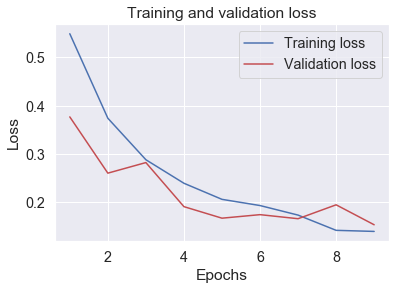

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

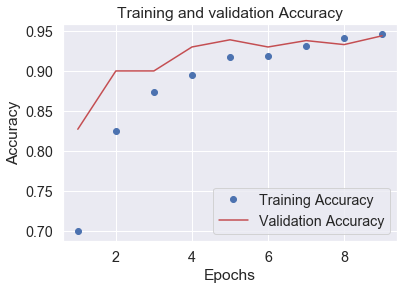

In [57]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_val)):
    
    result = model.predict(X_val[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_val[x]):
        if np.argmax(Y_val[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_val[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("Positive Accuracy: ", pos_correct/pos_cnt*100, "%")
print("Negative Accuracy: ", neg_correct/neg_cnt*100, "%")

Positive Accuracy:  96.71179883945842 %
Negative Accuracy:  91.92546583850931 %


In [59]:
results = model.evaluate(X_test, Y_test)
print(results)

1657/1657 [==============================] - 2s 1ms/step
[0.16096415556405205, 0.9287869640697394]


In [203]:
df = SP_cleaned_tweets_New

In [205]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(SP_cleaned_tweets_New)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(SP_cleaned_tweets_New)
X = pad_sequences(X)

In [206]:
tw_df = pd.DataFrame.from_dict({"Tweet":SP_cleaned_tweets_New})

In [209]:
tw_df.head()

,Tweet
0,Boston bruins finally won this one Celtics and bruins you need to do what the Red Sox did
1,New York Rangers vs Boston Bruins Jan 19 2019 predictions NHL NY Rangers – Boston Saturday 7 00 pm ET 00 00 90 00 Watch and bet New York Rangers – Boston Bruins live Sign in or Register it’s free to…
2,RT 4 takeaways from the Bruins’ 5 2 win over the Blues
3,RT Patrick Maroon vs Zdeno Chara from St Louis Blues at Boston Bruins Jan 17 2019
4,RT Patrick Maroon vs Zdeno Chara from St Louis Blues at Boston Bruins Jan 17 2019


In [210]:
neg_correct = 0 
pos_correct = 0
i = 0
tw_df_New = []
for x in range(len(X)):
    result = model.predict(X[x].reshape(1,X.shape[1]),batch_size=1,verbose = 2)[0]
    
    if np.argmax(result) == 0:
        tw_df_New.append(0)
        neg_correct += 1
    else:
        tw_df_New.append(1)
        pos_correct += 1
    i = i +1

In [212]:
print(neg_correct)
print(pos_correct)

983
1685


In [213]:
tw_df["Sentiment"] = tw_df_New

In [225]:
New_T_pos = tw_df[tw_df["Sentiment"] == 1]
print("Positive Tweets",New_T_pos.shape)

Positive Tweets (1685, 2)


In [226]:
New_T_pos = New_T_pos[:1000]
print("Positive Tweets",New_T_pos.shape)

Positive Tweets (1000, 2)


In [227]:
New_T_neg = tw_df[tw_df["Sentiment"] == 0]
print("Negative Tweets",New_T_neg.shape)

Negative Tweets (983, 2)


In [228]:
New_all_PN = pd.concat([New_T_pos,New_T_neg])
print("Positive & Negative Tweets: ", New_all_PN.shape) # only positve and negative tweets 

Positive & Negative Tweets:  (1983, 2)


In [229]:
New_all_PN = New_all_PN.sample(frac=1) # Randomizing Dataframe rows
New_all_PN.shape

(1983, 2)

In [230]:
New_all_PN.head()

,Tweet,Sentiment
194,RT start early tonight from Boston Puck drops now Bruins 📺FOX Sports Midwest 📲FOX Sports app http…,1
1760,RT From An update from Rochester as balanced lines are producing first place results …,0
1452,RT OFFICIAL The have acquired right wing Justin Bailey from the Buffalo Sabres in exchange for forward Taylor Leier h…,1
942,RT Watch Bruins can leap frog Leafs tonight with a win in Philly Countdown to Leafs fans storming my mentions to tell me Toro…,1
387,I have the following games available for the Boston Bruins and Boston Celtics This Saturday 1 19 2019 vs the New York Rangers Loge 3 Row 6 Seats 3 amp 4 Celts Wednesday 1 30 2019 vs The Charlotte Ho…,0


In [233]:
Concated_Data = pd.concat([New_all_PN,AllTweets_sentiments_Cleaned])
print("Positive & Negative Tweets: ", Concated_Data.shape) # only positve and negative tweets 

Positive & Negative Tweets:  (8608, 3)


C:\Users\Fahad Hameed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [234]:
Concated_Data_Tweets = Concated_Data.Tweet  # only tweets
Concated_Data_sentiments = Concated_Data.sentiment # only sentiments

In [237]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(Concated_Data_Tweets)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(Concated_Data_Tweets)
X = pad_sequences(X)

Y = pd.get_dummies(Concated_Data_sentiments).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6456, 60) (6456, 2)
(2152, 60) (2152, 2)


In [243]:
batch_size = 100
history = model.fit(partial_X_train, 
                    partial_Y_train, 
                    epochs = 4, 
                    batch_size=batch_size, 
                    validation_data=(X_val, Y_val))

C:\Users\Fahad Hameed\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 3968 samples, validate on 1000 samples
Epoch 1/4
3968/3968 [==============================] - 19s 5ms/step - loss: 0.0556 - acc: 0.9773 - val_loss: 0.2205 - val_acc: 0.9360
Epoch 2/4
3968/3968 [==============================] - 25s 6ms/step - loss: 0.0522 - acc: 0.9796 - val_loss: 0.2323 - val_acc: 0.9370
Epoch 3/4
3968/3968 [==============================] - 28s 7ms/step - loss: 0.0448 - acc: 0.9821 - val_loss: 0.2168 - val_acc: 0.9400
Epoch 4/4
3968/3968 [==============================] - 28s 7ms/step - loss: 0.0388 - acc: 0.9854 - val_loss: 0.2376 - val_acc: 0.9450


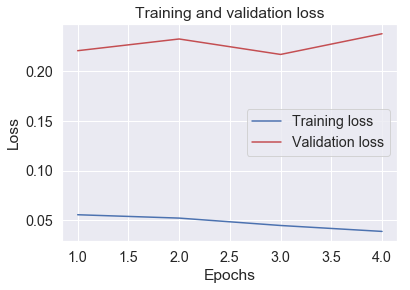

In [244]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

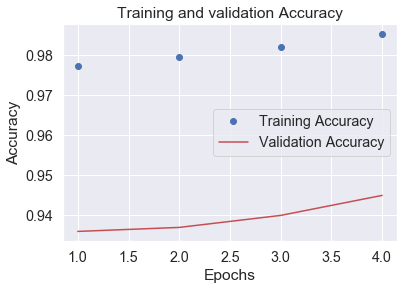

In [245]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [246]:
results = model.evaluate(X_test, Y_test)
print(results)

2152/2152 [==============================] - 4s 2ms/step
[2.0677739368495445, 0.5190520446096655]
